In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the preprocessed dataset
file_path = "../data/preprocessed_breast_cancer_data.csv"  # Path to preprocessed file
data = pd.read_csv(file_path)

In [3]:
# displaying basic information
print("Dataset loaded for EDA")
print(data.info())
print(data.describe())

Dataset loaded for EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   object 
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status

In [4]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 2509 rows and 34 columns.


In [5]:
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
Patient ID                        2509
Age at Diagnosis                  1843
Type of Breast Surgery               2
Cancer Type                          2
Cancer Type Detailed                 8
Cellularity                          3
Chemotherapy                         2
Pam50 + Claudin-low subtype          7
Cohort                               9
ER status measured by IHC            2
ER Status                            2
Neoplasm Histologic Grade            3
HER2 status measured by SNP6         4
HER2 Status                          2
Tumor Other Histologic Subtype       8
Hormone Therapy                      2
Inferred Menopausal State            2
Integrative Cluster                 11
Primary Tumor Laterality             2
Lymph nodes examined positive       32
Mutation Count                      32
Nottingham prognostic index        436
Oncotree Code                        8
Overall Survival (Months)         1743
Overall Survival Status          

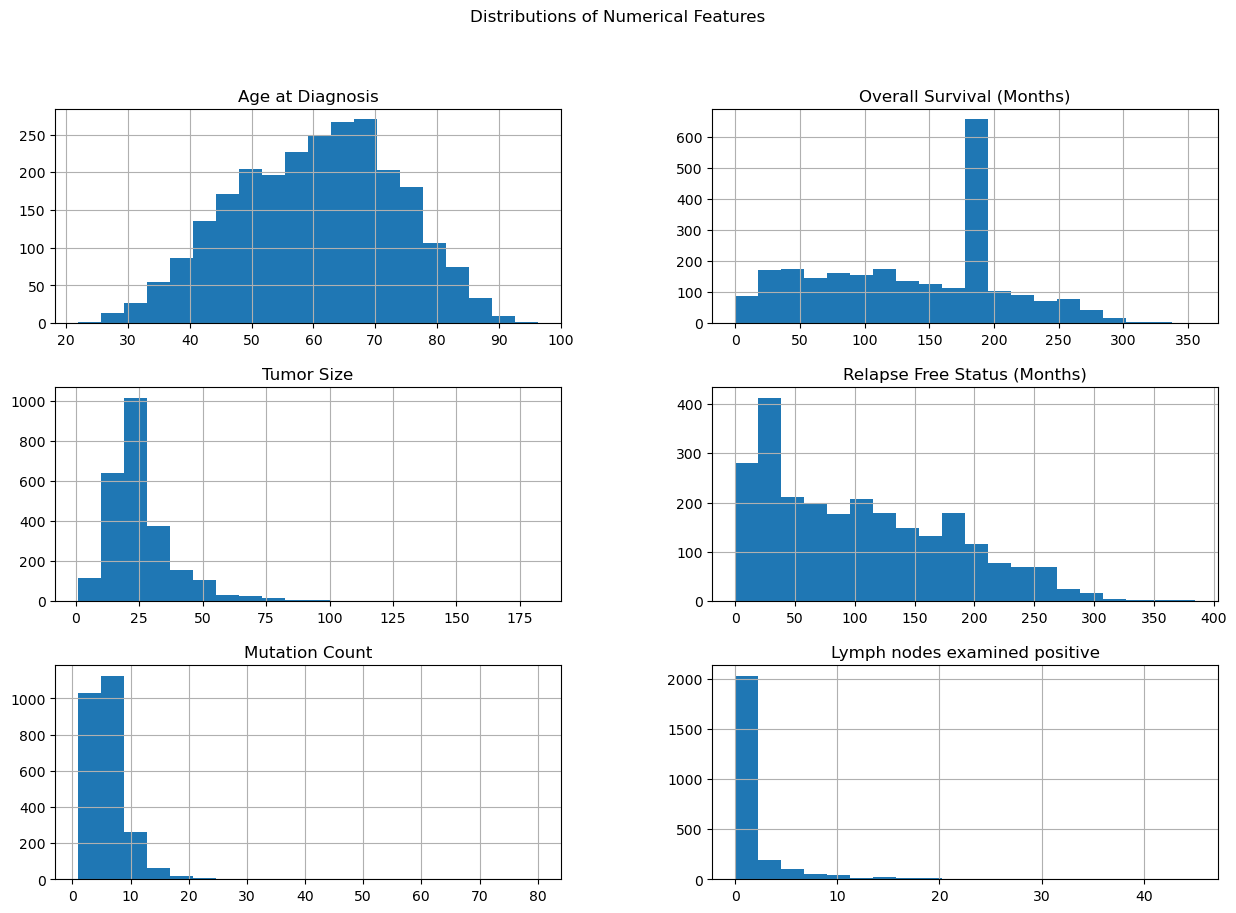

In [6]:
# Plot histograms for numerical columns
numerical_cols = [
    'Age at Diagnosis', 'Overall Survival (Months)', 'Tumor Size',
    'Relapse Free Status (Months)', 'Mutation Count', 'Lymph nodes examined positive'
]
data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Numerical Features")
plt.show()

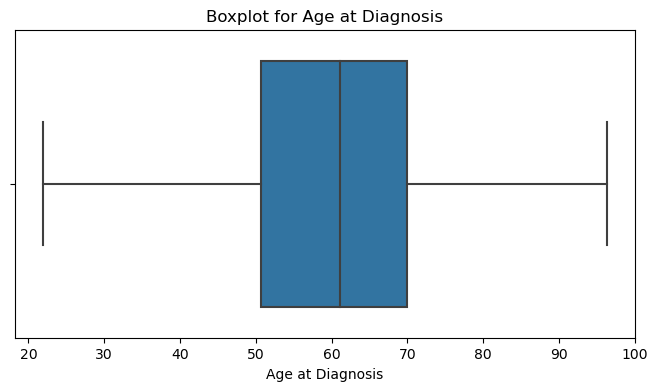

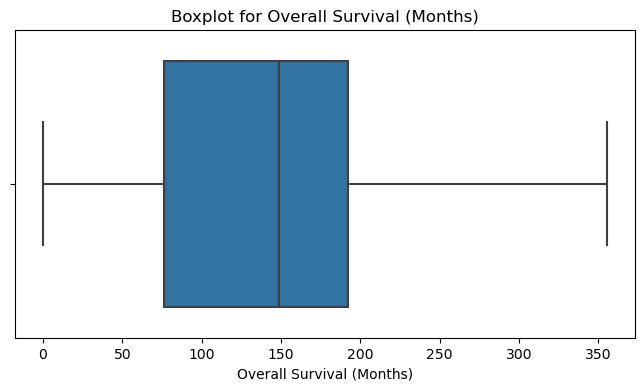

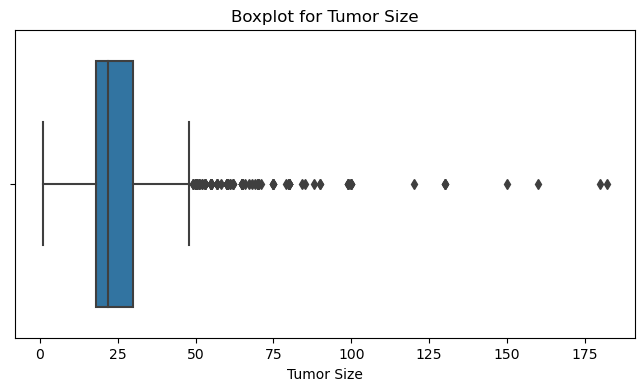

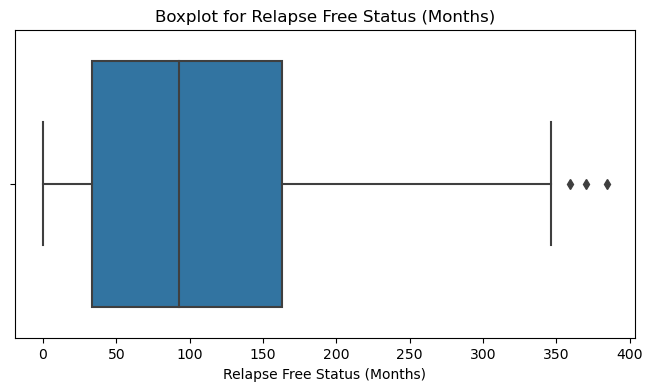

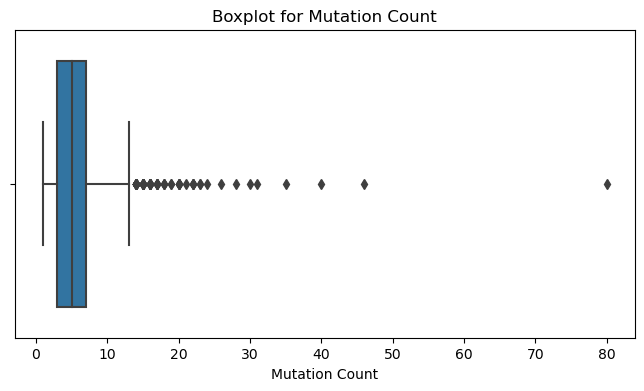

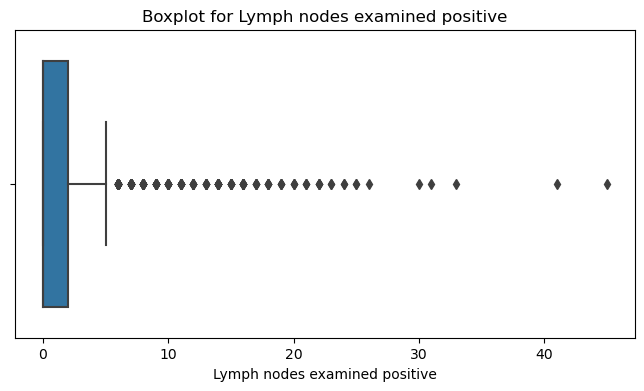

In [7]:
# Plot boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

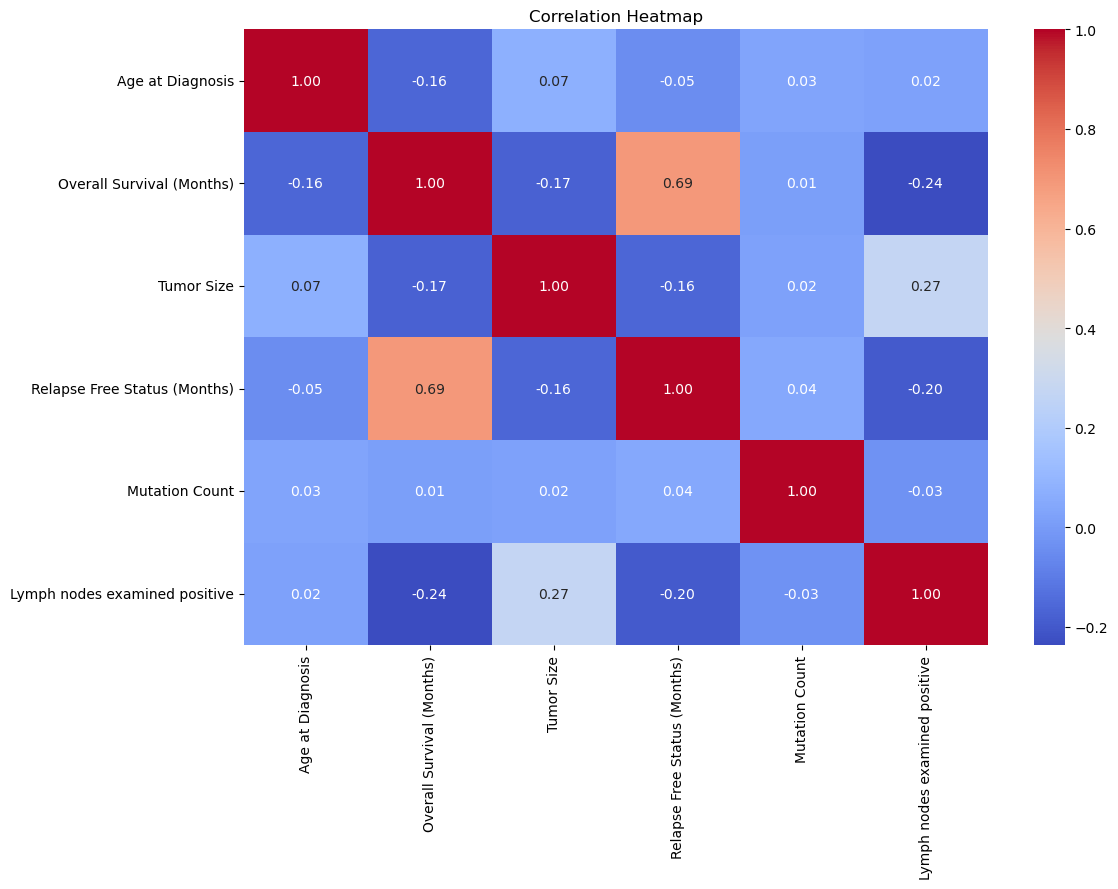

In [8]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, 
            fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows a high positive correlation (0.69) between `Relapse Free Status (Months)` and `Overall Survival (Months)`

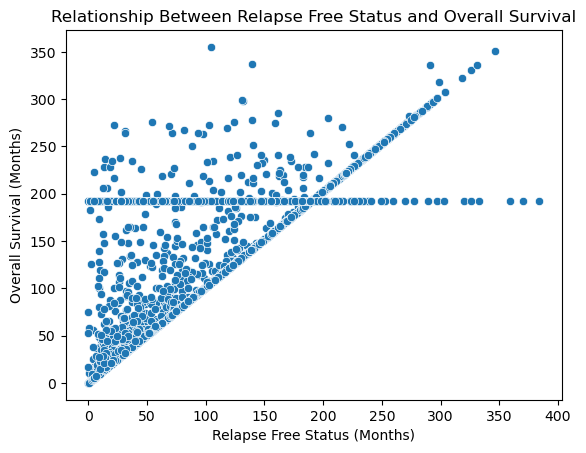

In [9]:
# scatter plot
sns.scatterplot(x=data['Relapse Free Status (Months)'], 
                y=data['Overall Survival (Months)'])
plt.title("Relationship Between Relapse Free Status and Overall Survival")
plt.xlabel("Relapse Free Status (Months)")
plt.ylabel("Overall Survival (Months)")
plt.show()

Observations:
1. **Positive Relationship**:
- There is a clear linear trend where as Relapse Free Status (Months) increases, Overall Survival (Months) also increases.
- This aligns with the correlation of 0.69 observed in the heatmap.

2. **Distinct Clusters**:
- Many data points lie along the diagonal, indicating cases where Relapse Free Status (Months) is equal to or close to Overall Survival (Months). This is expected as relapse-free patients likely survive longer without recurrence.
- There’s a horizontal line of data points around Overall Survival (Months) ~200, suggesting some cases where survival doesn't vary much regardless of relapse-free time.

3. **Potential Outliers**:
- A few points deviate significantly from the diagonal, particularly where Relapse Free Status is very low but Overall Survival is high. These might represent cases of delayed relapse or other medical complexities.

### Cases where `Relapse Free Status` is close to or equal to `Overall Survival`

In [11]:
# allow for a small tolerance (1 month) to consider two values "close"
threshold = 1

# filter cases where relapse free status is approximately equal to overall survival
close_cases = data[abs(data['Overall Survival (Months)'] - data['Relapse Free Status (Months)']) <= threshold]

print(f"Number of cases where Relapse Free Status is approximately equal to Overall Survival: {len(close_cases)}")
print("Sample of these cases:")
print(close_cases.head())

Number of cases where Relapse Free Status is approximately equal to Overall Survival: 288
Sample of these cases:
   Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
10    MB-0028             86.41      Breast Conserving  Breast Cancer   
11    MB-0035             84.22             Mastectomy  Breast Cancer   
15    MB-0046             83.02             Mastectomy  Breast Cancer   
17    MB-0050             44.64      Breast Conserving  Breast Cancer   
20    MB-0056             62.62             Mastectomy  Breast Cancer   

                         Cancer Type Detailed Cellularity Chemotherapy  \
10           Breast Invasive Ductal Carcinoma    Moderate           No   
11          Breast Invasive Lobular Carcinoma        High           No   
15           Breast Invasive Ductal Carcinoma        High           No   
17  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
20  Breast Mixed Ductal and Lobular Carcinoma        High           No   

   

Summary statistics for cases where Relapse Free Status ≈ Overall Survival:
       Age at Diagnosis      Cohort  Neoplasm Histologic Grade  \
count        288.000000  288.000000                 288.000000   
mean          65.193750    2.197917                   2.409722   
std           14.211326    1.525302                   0.682414   
min           26.360000    1.000000                   1.000000   
25%           54.567500    1.000000                   2.000000   
50%           66.655000    1.000000                   3.000000   
75%           75.927500    3.000000                   3.000000   
max           96.290000    8.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                     288.000000      288.000000   
mean                        2.256944        5.131944   
std                         4.842821        3.409858   
min                         0.000000        1.000000   
25%                         0.000000        3.0000

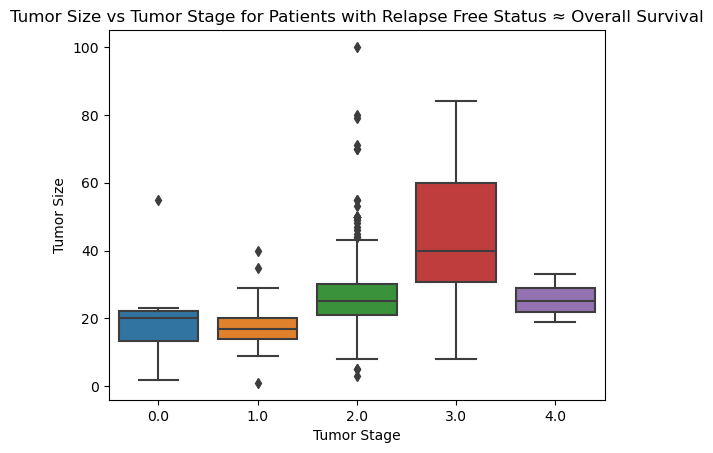

In [12]:
# Summary statistics for these patients
print("Summary statistics for cases where Relapse Free Status ≈ Overall Survival:")
print(close_cases.describe())

# Visualize distributions
sns.boxplot(x=close_cases['Tumor Stage'], y=close_cases['Tumor Size'])
plt.title("Tumor Size vs Tumor Stage for Patients with Relapse Free Status ≈ Overall Survival")
plt.show()

Observations:
1. **Tumor Size Increases with Tumor Stage**:
    - Median tumor size increases as the tumor stage progresses from Stage 0 to Stage 3
    - Patients in Stage 3 tend to have significantly larger tumors compared to earlier stages.

2. **Stage 4 Exception**:
    - In Stage 4, the median tumor size appears smaller than in Stage 3. This could be due to:
        - A smaller sample size in Stage 4
        - Aggressive treatment or different progression patterns for Stage 4 tumors.

3. **Outliers**:
    - There are several outliers across all stages, especially in Stage 2 and Stage 3, where tumor size exceeds 80. These could represent rare cases of extremely large tumors.

### Investigating Outliers

Identify the patients with large tumor sizes (**assuming** above 80) and analyze their other features, such as treatment outcomes and survival times.

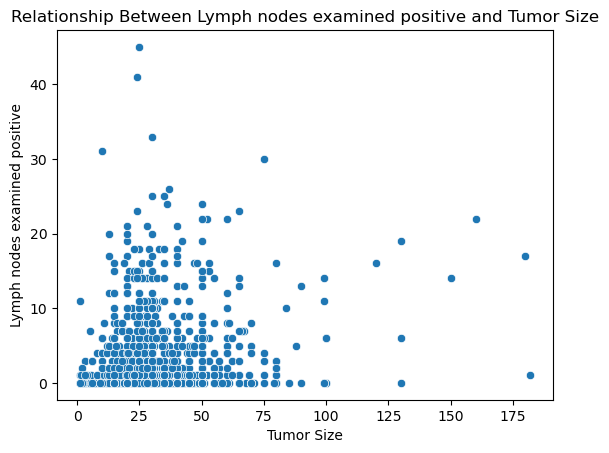

In [10]:
# scatter plot
sns.scatterplot(x=data['Tumor Size'], 
                y=data['Lymph nodes examined positive'])
plt.title("Relationship Between Lymph nodes examined positive and Tumor Size")
plt.xlabel("Tumor Size")
plt.ylabel("Lymph nodes examined positive")
plt.show()

1. **Clustered Points**:
- There’s a significant clustering of data points for smaller tumor sizes (below ~50) and lymph nodes examined positive values below ~10. This suggests most patients in the dataset had smaller tumor sizes with fewer positive lymph nodes.

2. **Positive Trend (Weak Correlation)**:
- A loose upward trend is visible, indicating that as Tumor Size increases, the likelihood of having more Lymph Nodes Examined Positive also increases, though the relationship is not strong.

3. **Outliers**:
- A few extreme points are visible:
    - Tumor sizes above ~125 with fewer positive lymph nodes.
    - Cases where lymph nodes examined positive exceed 30, even with relatively small tumors.